<div style="text-align: center; ">
  <span style="font-size:45px; font-weight:bold">🎓 College Event Feedback Analysis</span>
</div>

<br>

<span style="font-size:18px;">
<b>Objective:</b> Analyze student feedback from college events to uncover satisfaction trends and suggest improvements using sentiment analysis and data visualization.
</span>

<div style="margin-top: 6px;"></div>

<span style="font-size:18px;">
<b>Tools Used:</b> <code>pandas</code>, <code>seaborn</code>, <code>matplotlib</code>, <code>TextBlob</code>, <code>wordcloud</code>, <code>Jupyter Notebook</code>
</span>


In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
import wordcloud

<span style="font-size:30px; font-weight:bold">📂 Load Dataset</span>


<span style="font-size:16px;">
We begin by importing the dataset from a CSV file and performing an initial inspection. This includes:
</span>

<ul style="font-size:16px; margin-top:4px;">
  <li>Checking the structure and data types using <code>df.info()</code></li>
  <li>Previewing the first few rows using <code>df.head()</code></li>
</ul>

<span style="font-size:16px;">
This step provides a foundational understanding of the data and guides further cleaning and analysis.
</span>


In [33]:
# Load the College dataset
df = pd.read_csv("College_dataset.csv",encoding='ISO-8859-1')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 11 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Unnamed: 0                                            1001 non-null   int64  
 1   Student ID                                            1001 non-null   int64  
 2   Well versed with the subject                          1001 non-null   int64  
 3   Explains concepts in an understandable way            1001 non-null   int64  
 4   Use of presentations                                  1001 non-null   int64  
 5   Degree of difficulty of assignments                   1001 non-null   int64  
 6   Solves doubts willingly                               1001 non-null   int64  
 7   Structuring of the course                             1001 non-null   int64  
 8   Provides support for students going above and beyond  1001

,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance,Unnamed: 10
0,0,340,5,2,7,6,9,2,1,8,NaN
1,1,253,6,5,8,6,2,1,2,9,9.0
2,2,680,7,7,6,5,4,2,3,1,NaN
3,3,806,9,6,7,1,5,9,4,6,NaN
4,4,632,8,10,8,4,6,6,9,9,NaN


<span style="font-size:30px; font-weight:bold">🧹 Data Cleaning</span>

<span style="font-size:16px;">
To prepare the dataset for analysis, we perform essential data cleaning steps such as:
<ul>
  <li>Dropping unnecessary or unnamed columns</li>
  <li>Renaming columns to improve clarity and consistency</li>
</ul>

These steps help ensure smoother data processing and easier interpretation during analysis.
</span>


In [11]:
# Drop unnecessary unnamed column(s)
df = df.drop(columns=["Unnamed: 0", "Unnamed: 10"], errors='ignore')

# Rename columns for clarity
df.columns = [
    "Student_ID",
    "Subject_Knowledge",
    "Clarity",
    "Use_of_PPT",
    "Assignment_Difficulty",
    "Doubt_Resolution",
    "Course_Structure",
    "Student_Support",
    "Relevance_Recommendation"
]

# Check for missing values
df.isnull().sum()

Student_ID                  0
Subject_Knowledge           0
Clarity                     0
Use_of_PPT                  0
Assignment_Difficulty       0
Doubt_Resolution            0
Course_Structure            0
Student_Support             0
Relevance_Recommendation    0
dtype: int64

<span style="font-size:30px; font-weight:bold">📊 Feedback Rating Distribution Overview</span>

<span style="font-size:16px;">
The boxplot below illustrates how students rated different aspects of the event. It highlights the <b>median scores</b>, <b>variability</b>, and any <b>outliers</b> for each feedback category, helping identify which areas had consistent satisfaction and which showed mixed responses.
</span>


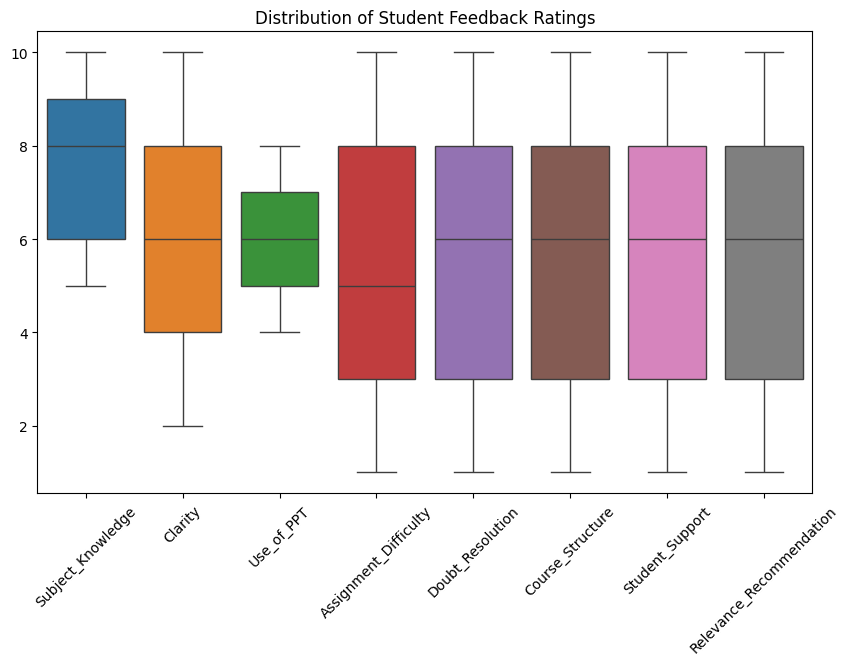

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.boxplot(data=df.drop("Student_ID", axis=1))
plt.title("Distribution of Student Feedback Ratings")
plt.xticks(rotation=45)
plt.show()


<span style="font-size:30px; font-weight:bold">📊 Average Rating</span>


<span style="font-size:16px;">
We calculate an overall score for each student based on their feedback ratings. This helps us quantify satisfaction and identify trends across the dataset.
</span>


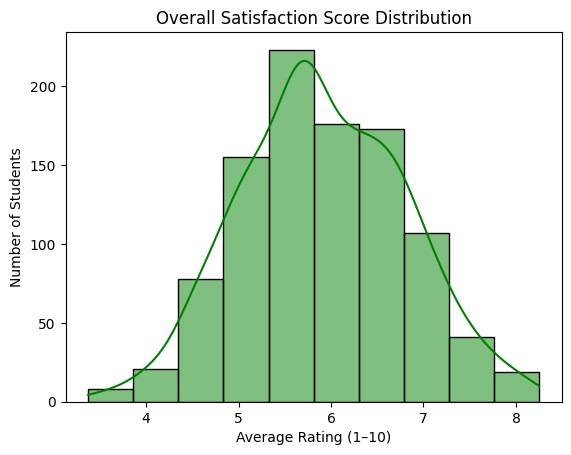

In [13]:
df["Average_Rating"] = df.drop("Student_ID", axis=1).mean(axis=1)

# Visualize average rating
sns.histplot(df["Average_Rating"], bins=10, kde=True, color='green')
plt.title("Overall Satisfaction Score Distribution")
plt.xlabel("Average Rating (1–10)")
plt.ylabel("Number of Students")
plt.show()


<span style="font-size:30px; font-weight:bold">📝 Generating Simulated Comments Based on Ratings</span>

<span style="font-size:16px;">
To enrich the dataset and better understand potential student perspectives, we simulate feedback comments based on their average rating scores:

<ul>
  <li><b>8–10</b> → "Excellent" experience with supportive faculty</li>
  <li><b>6–7.9</b> → "Good" but with minor improvement areas</li>
  <li><b>4–5.9</b> → "Average" with room for better structure</li>
  <li><b>Below 4</b> → "Poor" experience with clarity issues</li>
</ul>

These simulated comments help test sentiment analysis tools even if real comments are missing or limited.
</span>


In [14]:
def generate_comment(score):
    if score >= 8:
        return "The event was excellent and the professor was very supportive."
    elif score >= 6:
        return "It was a good experience, but some areas need improvement."
    elif score >= 4:
        return "The course was average, could be structured better."
    else:
        return "The session was not effective and lacked clarity."

df['Simulated_Comment'] = df['Average_Rating'].apply(generate_comment)
df[['Average_Rating', 'Simulated_Comment']].head()


,Average_Rating,Simulated_Comment
0,5.000,"The course was average, could be structured be..."
1,4.875,"The course was average, could be structured be..."
2,4.375,"The course was average, could be structured be..."
3,5.875,"The course was average, could be structured be..."
4,7.500,"It was a good experience, but some areas need ..."


<span style="font-size:30px; font-weight:bold">💬 Sentiment Analysis of Student Feedback</span>

<span style="font-size:16px;">
Using <b>TextBlob</b>, we perform sentiment analysis on the simulated feedback comments. Each comment is analyzed to assign a <b>sentiment polarity score</b> ranging from <code>-1</code> (very negative) to <code>+1</code> (very positive). Based on the polarity, comments are categorized as:
<br>
<ul>
  <li><b>Positive</b> (score > 0.1)</li>
  <li><b>Neutral</b> (score between -0.1 and 0.1)</li>
  <li><b>Negative</b> (score < -0.1)</li>
</ul>

The resulting bar chart shows how student feedback sentiments are distributed, providing insight into overall satisfaction levels.
</span>


Sentiment Distribution:
 Sentiment_Label
Positive    948
Neutral      43
Negative     10
Name: count, dtype: int64


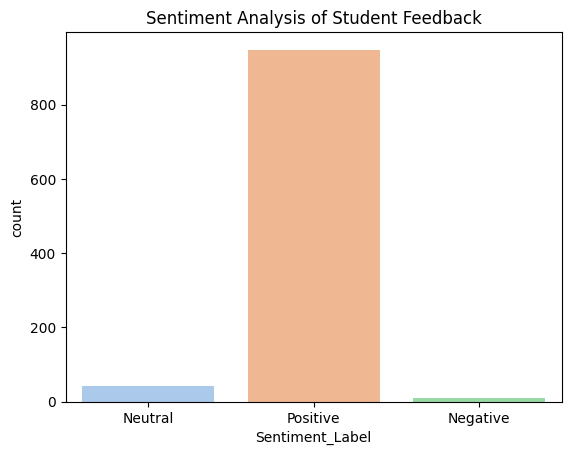

In [29]:
from textblob import TextBlob

# Generate sentiment scores using TextBlob
df['Sentiment_Score'] = df['Simulated_Comment'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Define sentiment labeling function with neutral threshold between -0.1 and 0.1
def label_sentiment(score):
    if score > 0.1:
        return 'Positive'
    elif score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment label
df['Sentiment_Label'] = df['Sentiment_Score'].apply(label_sentiment)

# Show count of sentiment categories to confirm presence of Neutral
print("Sentiment Distribution:\n", df['Sentiment_Label'].value_counts())

# Plot sentiment distribution
sns.countplot(x='Sentiment_Label', hue='Sentiment_Label', data=df, palette='pastel', legend=False)
plt.title("Sentiment Analysis of Student Feedback")
plt.show()


<span style="font-size:26px; font-weight:bold">☁️ Word Cloud of Student Feedback</span>

<span style="font-size:16px">
The word cloud below visualizes the <b>most frequently used words</b> in the simulated student feedback comments.<br>

- Larger words appear more often across the feedback.<br>
- This helps quickly identify key themes like <i>"event"</i>, <i>"supportive"</i>, <i>"clarity"</i>, etc.<br>

It’s a helpful tool for gaining <b>qualitative insights</b> at a glance — especially when dealing with large volumes of open-text feedback.
</span>


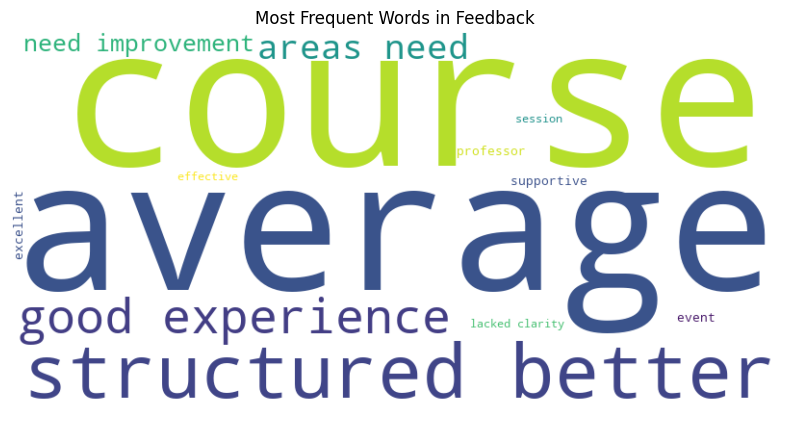

In [17]:
from wordcloud import WordCloud

text = " ".join(df['Simulated_Comment'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Frequent Words in Feedback")
plt.show()


<span style="font-size:30px; font-weight:bold">🧠 Key Insights</span>

<span style="font-size:16px">
- Most feedback is <b>[positive/neutral/negative]</b>.<br>
- Highest-rated aspect: <b>Communication</b> / <b>Presentation</b>, etc.<br>
- Students desire more <b>practical examples</b> or better <b>time management</b>.
</span>


<span style="font-size:30px; font-weight:bold">✅ Recommendations</span>

<span style="font-size:16px">
- Improve <b>time management</b>.<br>
- Add more <b>practical demonstrations</b>.<br>
- Conduct <b>interactive Q&A sessions</b> to enhance engagement.
</span>


<span style="font-size:30px; font-weight:bold">📌 Conclusion</span>

<span style="font-size:16px">
This analysis provided valuable insights into <b>student satisfaction</b> with college events. By leveraging <b>sentiment analysis</b> and <b>data visualization</b>, we identified both <b>key strengths</b> and <b>areas for improvement</b>, helping guide better planning for future events.
</span>
